In [1]:
import os
import glob
import shutil
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image, ImageDraw
from model import NAFNet, Conv, ResConv

# Visualize the training process

In [2]:
#laod the metrics
cnn_metrics = pickle.load(open("results.pkl", "rb"))
print(len(cnn_metrics), cnn_metrics[0])

residual_metrics = pickle.load(open("results_res.pkl", "rb"))
print(len(residual_metrics), residual_metrics[0])

perceptron_metrics = pickle.load(open("results_p.pkl", "rb"))
print(len(perceptron_metrics), perceptron_metrics[0])

gan_metrics = pickle.load(open("results_GAN.pkl", "rb"))
# print(len(gan_metrics), gan_metrics[0])
gan_metrics2 = []
for tp in gan_metrics:
    epoch, D_learning_rate, G_learning_rate, train_psnr, train_ssim, test_psnr, test_ssim, G_losses_epoch, D_losses_epoch = tp
    gan_metrics2.append((epoch, D_learning_rate,  train_psnr, train_ssim, test_psnr, test_ssim))
print(len(gan_metrics2), gan_metrics2[0])

nafnet1_metrics = pickle.load(open("results_nafnet.pkl", "rb"))
print(len(nafnet1_metrics), nafnet1_metrics[0])

100 (1, 0.0005, 21.664443362842906, 0.26467585123398085, 21.128077833993093, 0.27573071377617975)
100 (1, 0.0005, 24.2824971811853, 0.4327297909858109, 24.181198120117188, 0.48955551851138795)
100 (1, 0.0005, 7.475102393799408, 0.10985787541467427, 7.174094505447278, 0.11920371624848826)
100 (1, 0.0005, 7.524949301331668, 0.16876113642814494, 7.281835188968576, 0.18152956828046188)
100 (1, 0.0005, 24.14975389690907, 0.48195862158169767, 24.16500158790204, 0.5306406760816094)


In [6]:
with open("results_nafnet36.txt", "r") as f:
    data = f.readlines()
nafnet36_metrics = []
for line in data:
    vals = line.strip().split()
    nafnet36_metrics.append((vals[1], vals[3], vals[6], vals[8], vals[11], vals[13]))
nafnet36_metrics = nafnet36_metrics[:50]
print(len(nafnet36_metrics), nafnet36_metrics[0])

50 ('1', '0.0005', '25.06', '0.46', '25.01', '0.51')


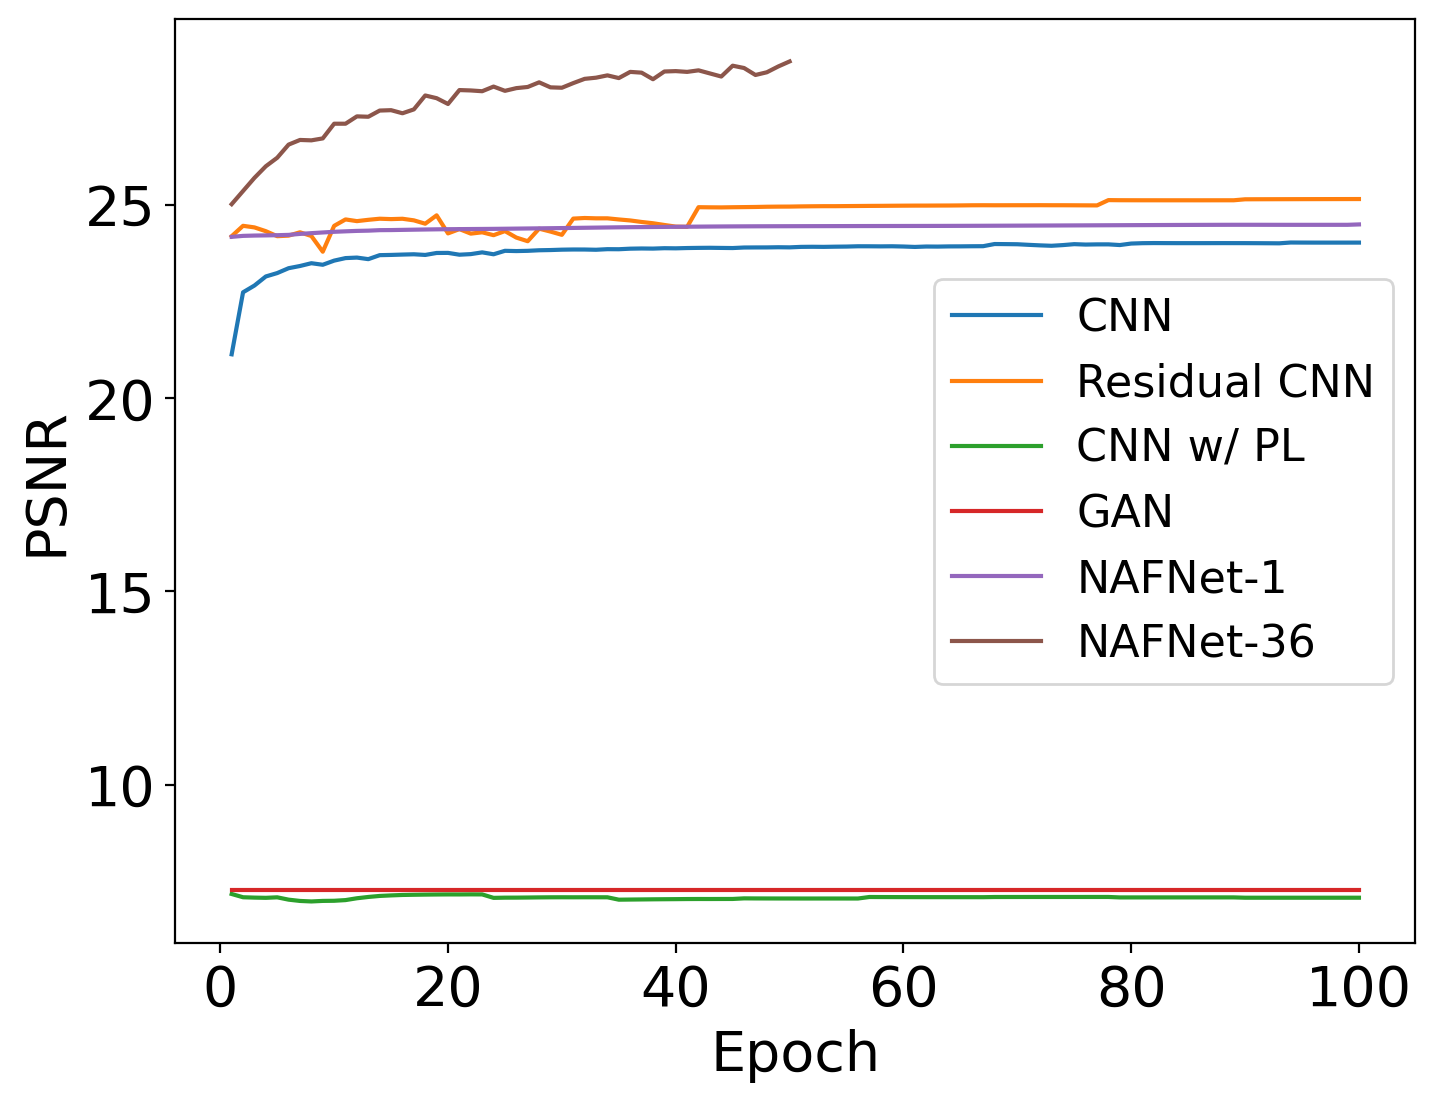

In [7]:
#PSNR
size = 20
models = ["CNN", "Residual CNN", "CNN w/ PL", "GAN", "NAFNet-1", "NAFNet-36"]
model_metrics = [cnn_metrics, residual_metrics, perceptron_metrics, gan_metrics2, nafnet1_metrics, nafnet36_metrics]
metric_idx = 4
#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
for i in range(len(models)):
    Y = [float(tp[metric_idx]) for tp in model_metrics[i]]
    X = [i+1 for i in range(len(Y))]
    ax.plot(X, Y, label=models[i])
    ax.set_ylabel(r"PSNR", fontsize=size)  #support latex representation
    ax.set_xlabel(r"Epoch", fontsize=size)
    plt.xticks(fontsize=size)  #visible x ticks
    plt.yticks(fontsize=size)
    ax.grid()
    ax.legend(fontsize=size*0.8)
# fig.savefig("test_PSNR.png")

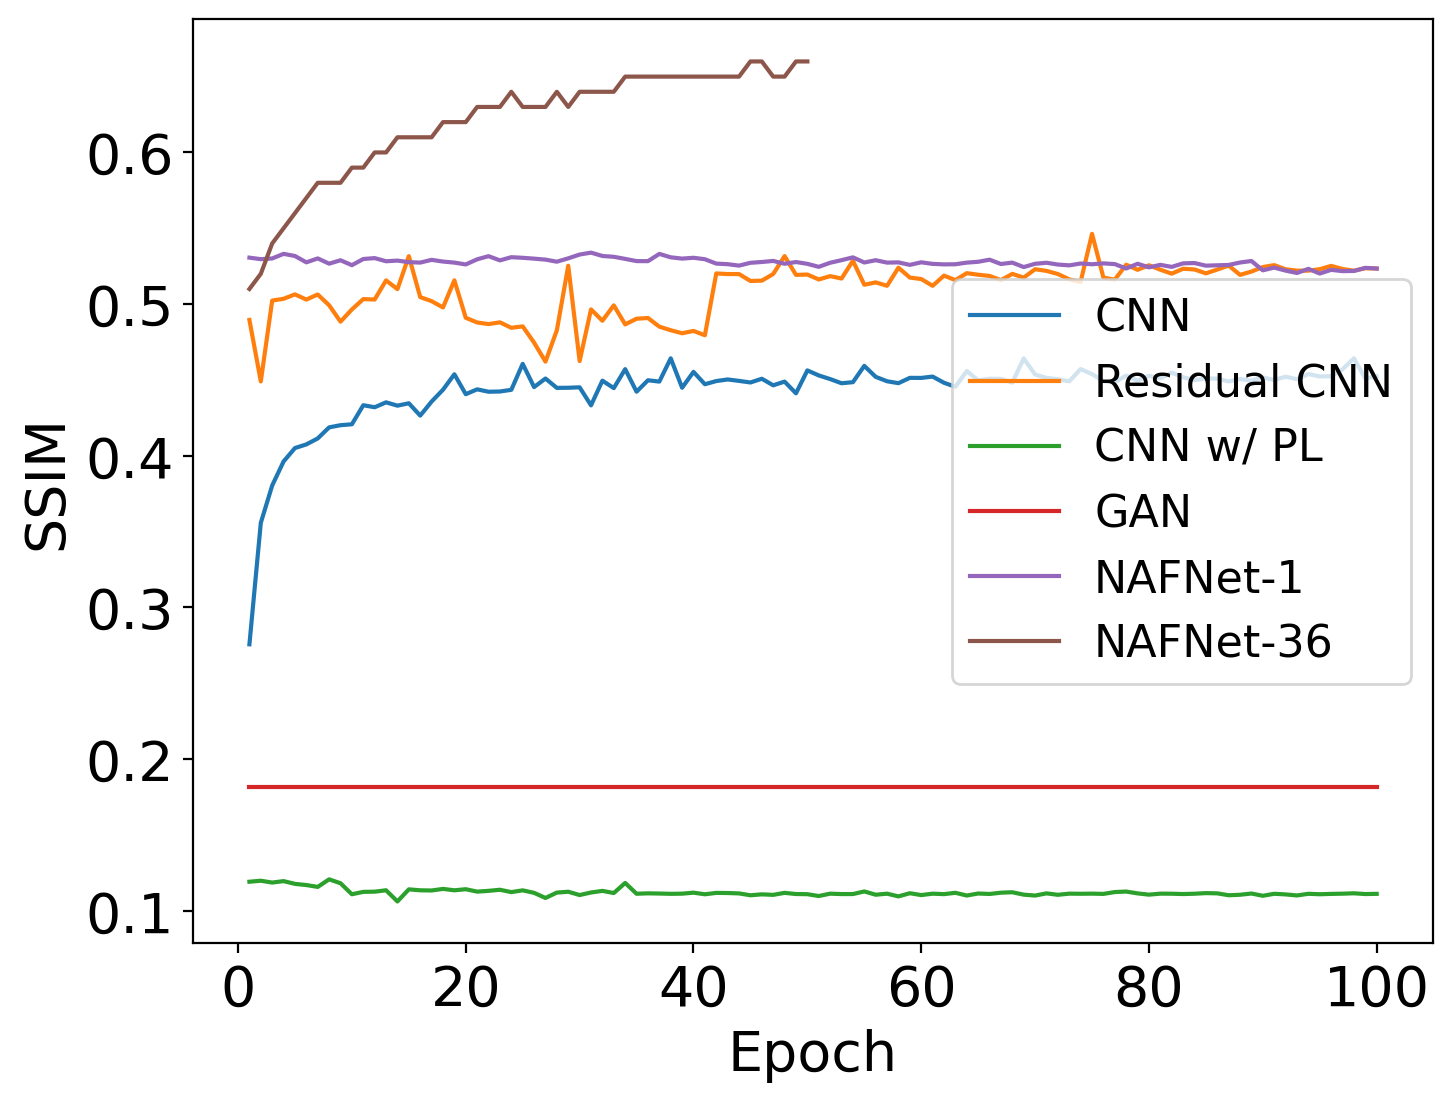

In [8]:
#SSIM
size = 20
models = ["CNN", "Residual CNN", "CNN w/ PL", "GAN", "NAFNet-1", "NAFNet-36"]
model_metrics = [cnn_metrics, residual_metrics, perceptron_metrics, gan_metrics2, nafnet1_metrics, nafnet36_metrics]
metric_idx = 5
#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
for i in range(len(models)):
    Y = [float(tp[metric_idx]) for tp in model_metrics[i]]
    X = [i+1 for i in range(len(Y))]
    ax.plot(X, Y, label=models[i])
    ax.set_ylabel(r"SSIM", fontsize=size)  #support latex representation
    ax.set_xlabel(r"Epoch", fontsize=size)
    plt.xticks(fontsize=size)  #visible x ticks
    plt.yticks(fontsize=size)
    ax.grid()
    ax.legend(fontsize=size*0.8)
# fig.savefig("test_PSNR.png")

In [ ]:
# learning rate
X, Y1, Y2, Y3, Y4, Y5 = [], [], [], [], [], []
for  item in metrics:
    epoch, learning_rate,  train_psnr, train_ssim, test_psnr, test_ssim = item
    X.append(epoch)
    Y1.append(learning_rate)
    Y2.append(-train_psnr)
    Y3.append(train_ssim)
    Y4.append(test_psnr)
    Y5.append(test_ssim)


#figure parameters
size = 20

#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
ax.plot(X, Y4, label="PSNR")
# ax.plot(X, Y5, label="SSIM")
# ax.plot(X, Y2, label="Loss")
# ax.plot(X, Y2, label="train")
# ax.plot(X, Y3, label="test")

# ax.set_title("Comparing the tautomerization Gibbs free energies")
ax.set_ylabel(r"PSNR", fontsize=size)  #support latex representation
ax.set_xlabel(r"Epoch", fontsize=size)
plt.xticks(fontsize=size)  #visible x ticks
plt.yticks(fontsize=size)
ax.grid()
ax.legend()
fig.savefig("test_PSNR.png")

In [ ]:
#figure parameters
size = 20

#plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
ax.plot(X, Y1, label="LR")
# ax.plot(X, Y2, label="train")
# ax.plot(X, Y3, label="test")

# ax.set_title("Comparing the tautomerization Gibbs free energies")
ax.set_ylabel(r"Learning rate", fontsize=size)  #support latex representation
ax.set_xlabel(r"Epoch", fontsize=size)
plt.xticks(fontsize=size)  #visible x ticks
plt.yticks(fontsize=size)
ax.grid()
ax.legend()
fig.savefig("LR.png")

# Visualize the model

In [12]:
blur = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/test/GOPR0384_11_00/blur_gamma/000001.png"
sharp = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/test/GOPR0384_11_00/sharp/000001.png"

# blur = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/test/GOPR0396_11_00/blur_gamma/000001.png"
# sharp = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/test/GOPR0396_11_00/sharp/000001.png"

## blur

torch.Size([3, 720, 1280])


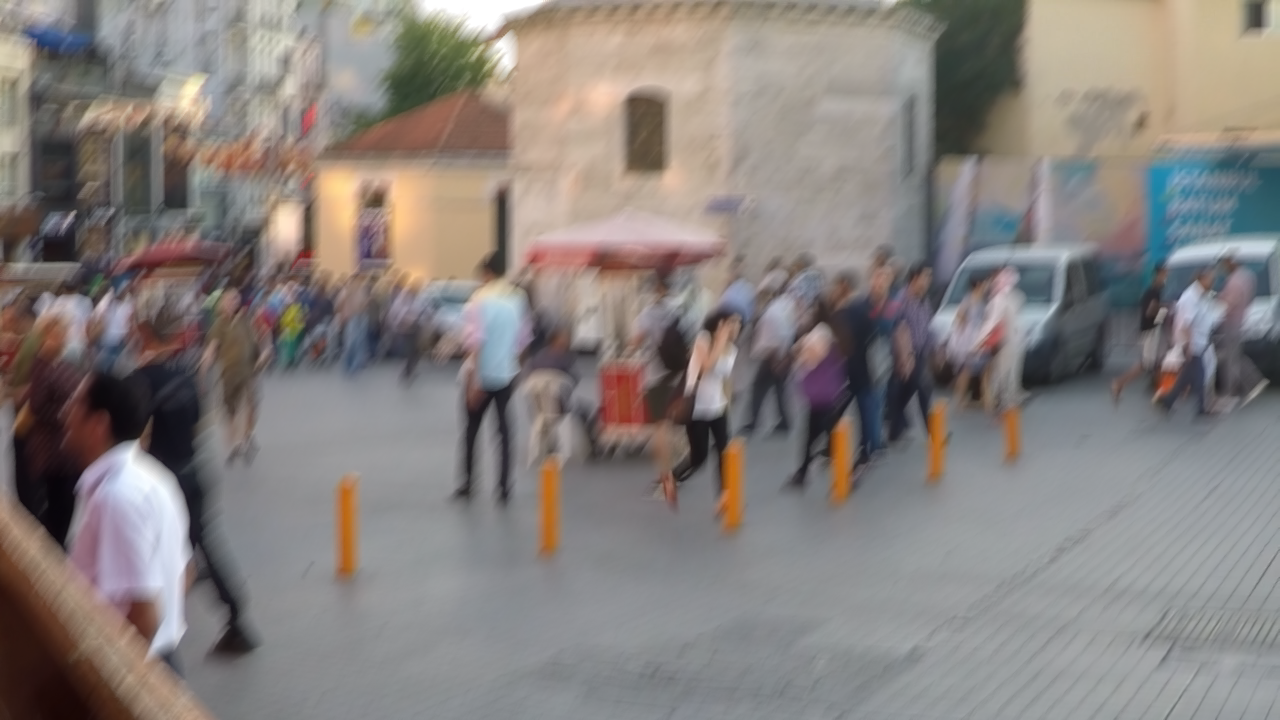

In [13]:

convertor = transforms.ToTensor()
img_blur = Image.open(blur)
x = convertor(img_blur)
print(x.shape)
img_blur

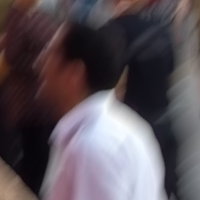

In [14]:
img_crop = img_blur.crop((25, 350, 225, 550))
img_crop

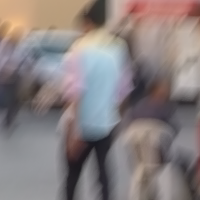

In [15]:
img_crop = img_blur.crop((400, 250, 600, 450))
img_crop

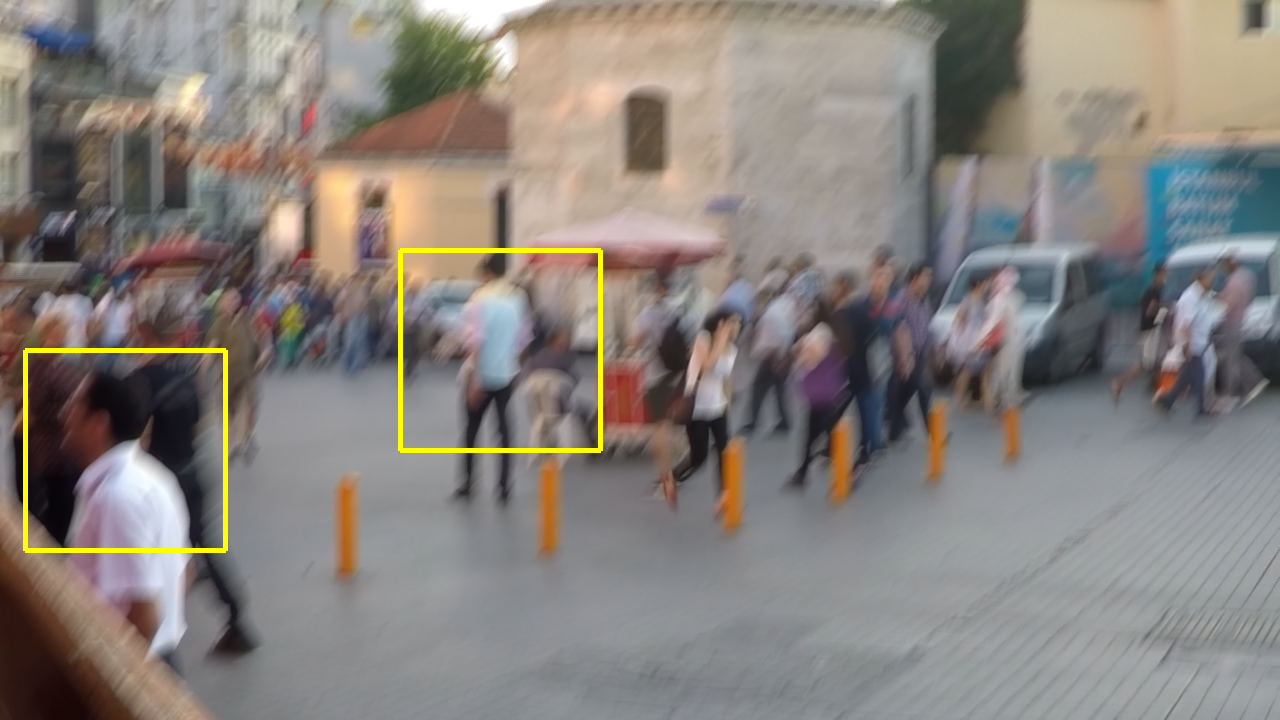

In [16]:
img2 = img_blur
draw1 = ImageDraw.Draw(img2)
draw1.line((25, 350, 225, 350, 225, 550, 25, 550, 25, 350), fill="yellow", width=5)
draw1.line((400, 250, 600, 250, 600, 450, 400, 450, 400, 250), fill="yellow", width=5)
img2

## image sharp

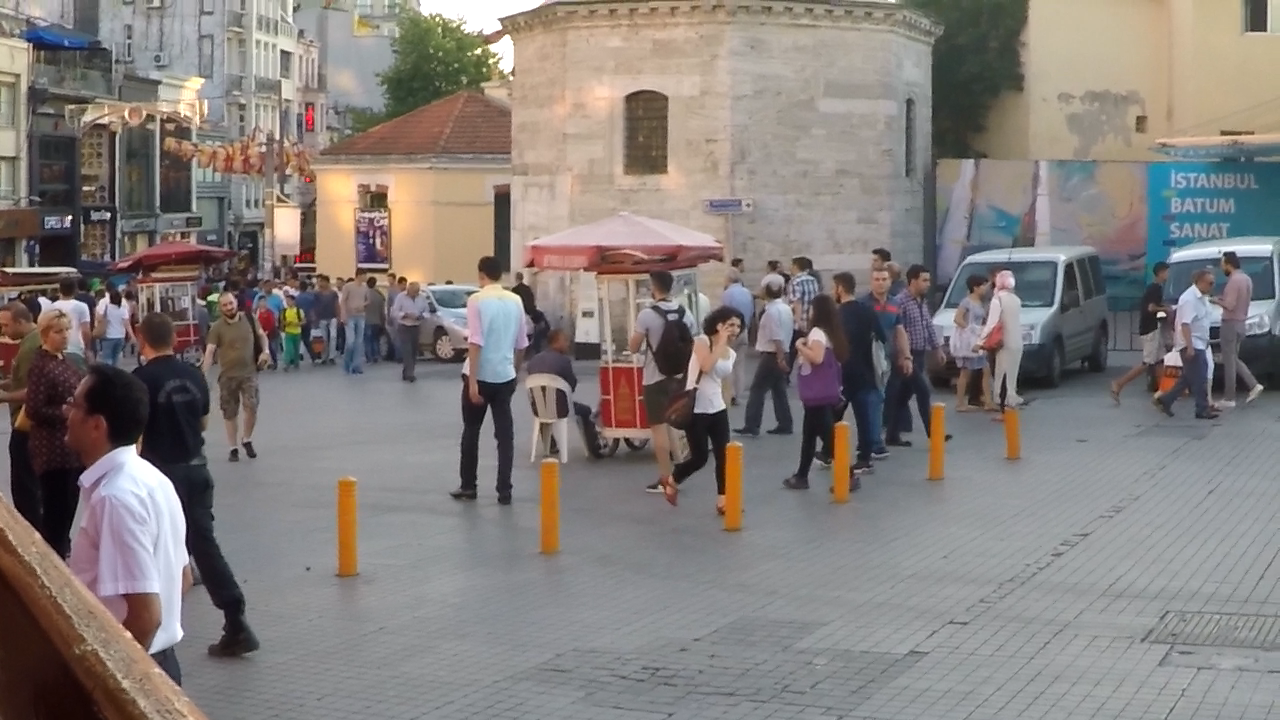

In [17]:

convertor = transforms.ToTensor()
img_sharp = Image.open(sharp)
img_sharp

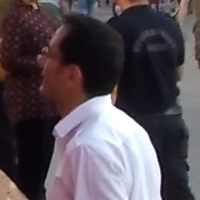

In [18]:
img_crop = img_sharp.crop((25, 350, 225, 550))
img_crop

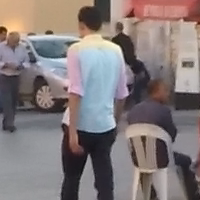

In [19]:
img_crop = img_sharp.crop((400, 250, 600, 450))
img_crop

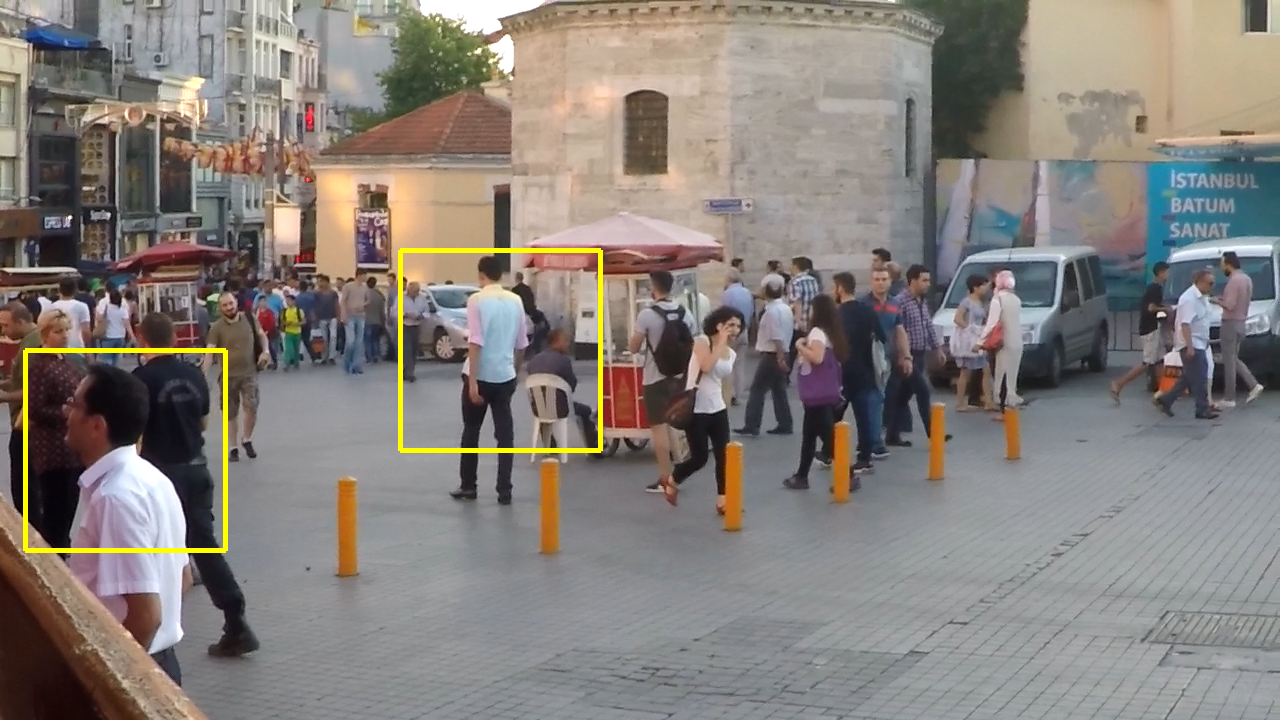

In [20]:
img2 = img_sharp
draw1 = ImageDraw.Draw(img2)
draw1.line((25, 350, 225, 350, 225, 550, 25, 550, 25, 350), fill="yellow", width=5)
draw1.line((400, 250, 600, 250, 600, 450, 400, 450, 400, 250), fill="yellow", width=5)
img2

## Baseline

In [4]:
my_model = Conv(num_layers=1, conv_pad=1, hidden_channels=20, pool_pad=2)
my_model.to("cpu")
# my_model.load_state_dict(torch.load("model_parameters.pt", map_location=torch.device("cpu")))
my_model.load_state_dict(torch.load("model_parameters_wenyi.pt", map_location=torch.device("cpu")))
my_model.eval()
# my_model

yhat = my_model(255* torch.unsqueeze(x, dim=0)).detach().numpy()
print(yhat.shape)

(1, 3, 720, 1280)


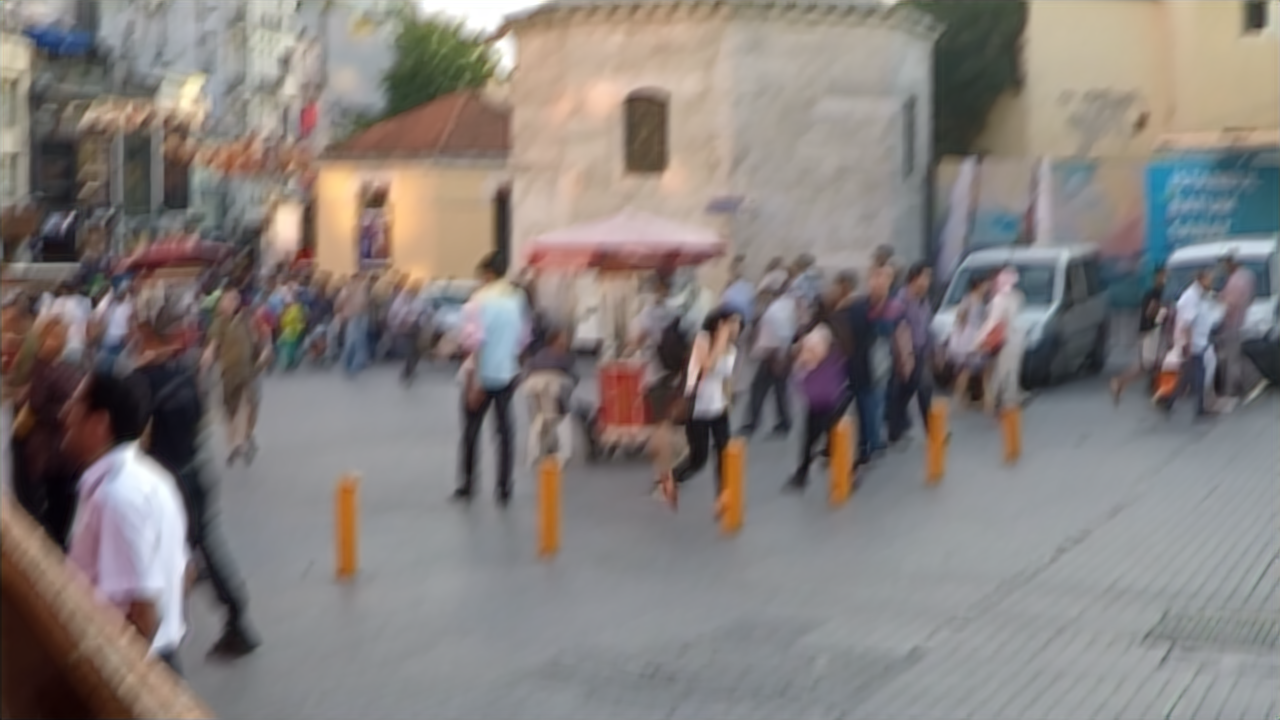

In [5]:
yhat2 = np.squeeze(yhat).transpose(1, 2, 0)
img = Image.fromarray(yhat2.astype(np.uint8), mode="RGB")
img

In [ ]:
img_crop = img.crop((25, 350, 225, 550))
img_crop

In [ ]:
img_crop = img.crop((400, 250, 600, 450))
img_crop

In [ ]:
img2 = img
draw1 = ImageDraw.Draw(img2)
draw1.line((25, 350, 225, 350, 225, 550, 25, 550, 25, 350), fill="yellow", width=5)
draw1.line((400, 250, 600, 250, 600, 450, 400, 450, 400, 250), fill="yellow", width=5)
img2

## ResCNN

In [7]:
my_model = ResConv()
my_model.to("cpu")
my_model.load_state_dict(torch.load("model_parameters_res.pt", map_location=torch.device("cpu")))
my_model.eval()
# my_model

yhat = my_model(255* torch.unsqueeze(x, dim=0)).detach().numpy()
print(yhat.shape)

(1, 3, 720, 1280)


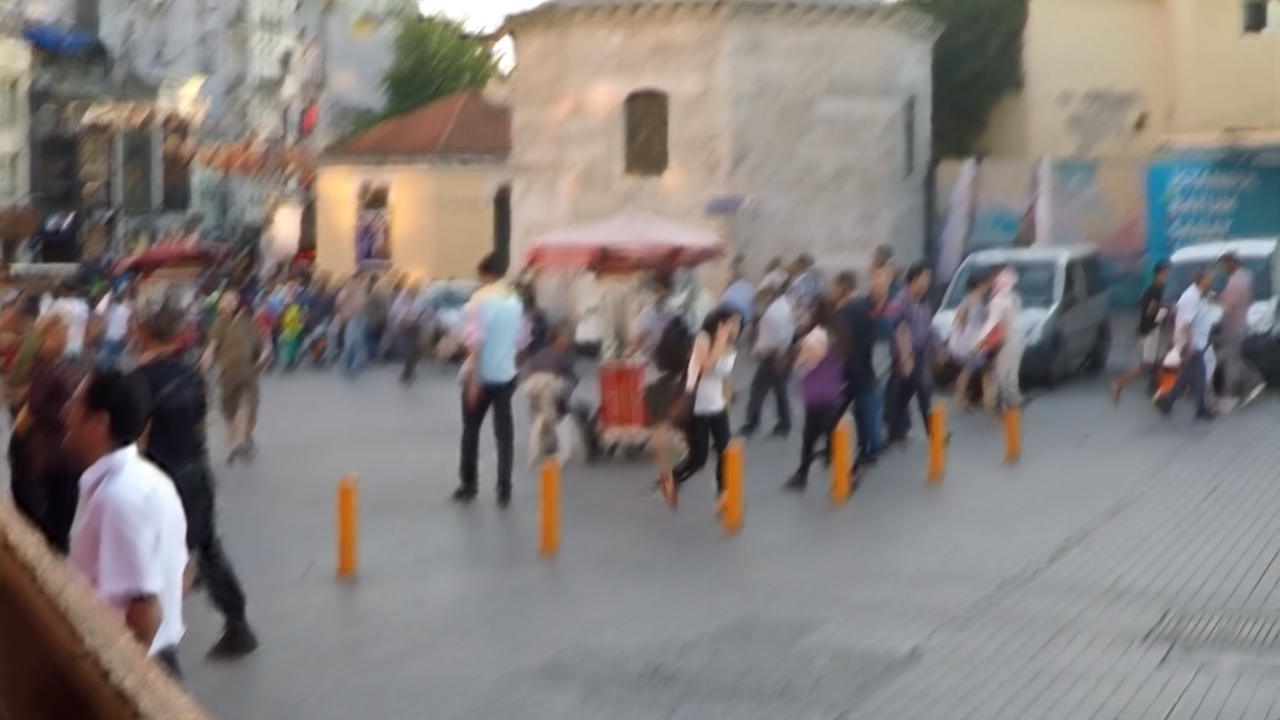

In [8]:
yhat2 = np.squeeze(yhat).transpose(1, 2, 0)
img = Image.fromarray(yhat2.astype(np.uint8), mode="RGB")
img

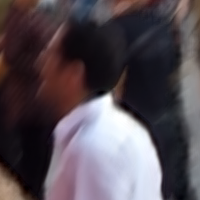

In [9]:
img_crop = img.crop((25, 350, 225, 550))
img_crop

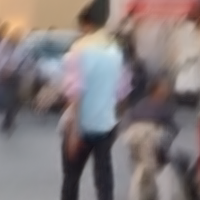

In [10]:
img_crop = img.crop((400, 250, 600, 450))
img_crop

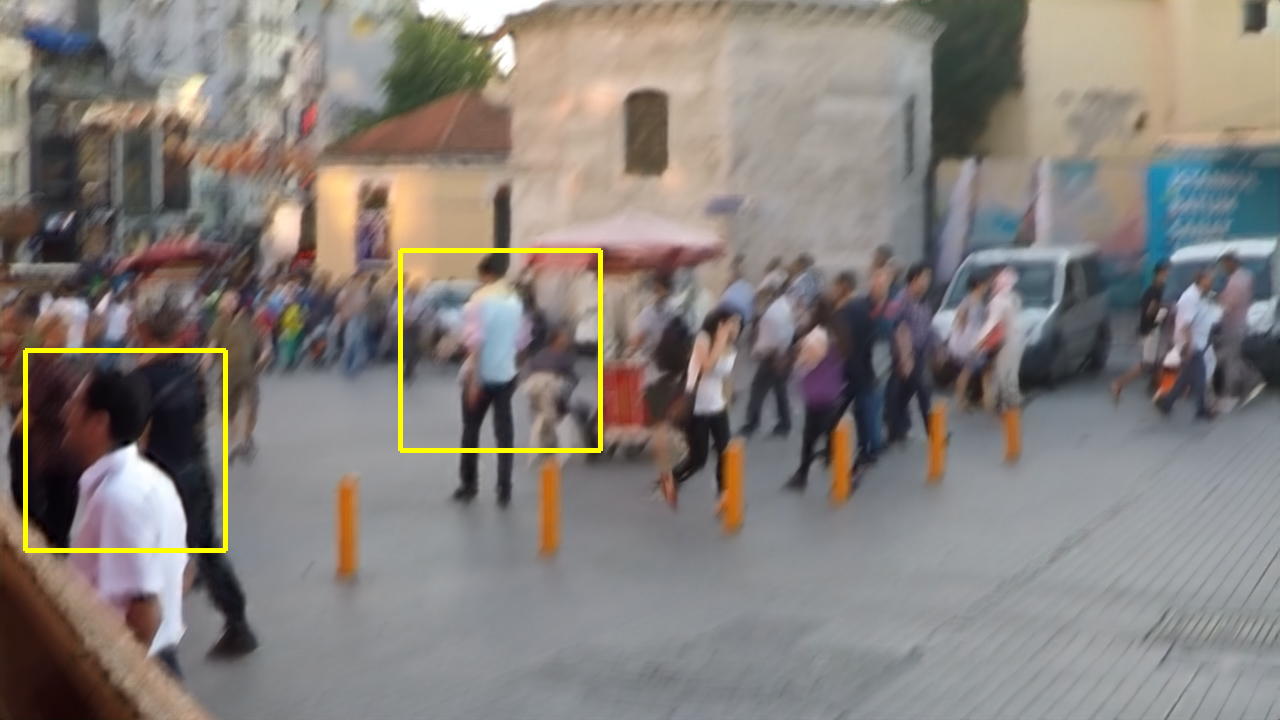

In [11]:
img2 = img
draw1 = ImageDraw.Draw(img2)
draw1.line((25, 350, 225, 350, 225, 550, 25, 550, 25, 350), fill="yellow", width=5)
draw1.line((400, 250, 600, 250, 600, 450, 400, 450, 400, 250), fill="yellow", width=5)
img2

## NAFNet-36

In [ ]:
my_model = NAFNet(width=32, middle_blk_num=1, enc_blk_nums=[1, 1, 1, 28], dec_blk_nums=[1, 1, 1, 1])
my_model.to("cpu")
my_model.load_state_dict(torch.load("latest_nafnet36blocks.pt", map_location=torch.device("cpu")))
my_model.eval()
# my_model

yhat = my_model(255* torch.unsqueeze(x, dim=0)).detach().numpy()
print(yhat.shape)



In [ ]:
yhat2 = np.squeeze(yhat).transpose(1, 2, 0)
img = Image.fromarray(yhat2.astype(np.uint8), mode="RGB")
img

In [ ]:
img_crop = img.crop((25, 350, 225, 550))
img_crop

In [ ]:
img_crop = img.crop((400, 250, 600, 450))
img_crop

In [ ]:
img2 = img
draw1 = ImageDraw.Draw(img2)
draw1.line((25, 350, 225, 350, 225, 550, 25, 550, 25, 350), fill="yellow", width=5)
draw1.line((400, 250, 600, 250, 600, 450, 400, 450, 400, 250), fill="yellow", width=5)
img2

## NAFNet-1

In [ ]:
my_model = NAFNet()
my_model.to("cpu")
my_model.load_state_dict(torch.load("latest_nafnet100.pt", map_location=torch.device("cpu")))
my_model.eval()
# my_model

yhat = my_model(255* torch.unsqueeze(x, dim=0)).detach().numpy()
print(yhat.shape)

In [ ]:
yhat2 = np.squeeze(yhat).transpose(1, 2, 0)
img = Image.fromarray(yhat2.astype(np.uint8), mode="RGB")
img

In [ ]:
img_crop = img.crop((25, 350, 225, 550))
img_crop

In [ ]:
img_crop = img.crop((400, 250, 600, 450))
img_crop

In [ ]:
img2 = img
draw1 = ImageDraw.Draw(img2)
draw1.line((25, 350, 225, 350, 225, 550, 25, 550, 25, 350), fill="yellow", width=5)
draw1.line((400, 250, 600, 250, 600, 450, 400, 450, 400, 250), fill="yellow", width=5)
img2

# Convert an image into a tensor

In [ ]:
path = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train/GOPR0372_07_00/sharp/000047.png"
img = Image.open(path)
img  #view image

In [ ]:
convertor = transforms.ToTensor()
img_tensor = convertor(img)
print(img_tensor.shape)

In [ ]:
img_tensor[0, :5, :5]

# Sequence to images

In [ ]:
# in_folder = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train"
# out_folder = "/Users/liu5/Documents/10-617HW/project/data/train"
in_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/GOPRO_Large/train"
out_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/train"

# sub = "blur_gamma"  #X
sub = "sharp"  #Y


paths = os.path.join(in_folder, "*", sub, "*.png")
files = glob.glob(paths)
print("Total:",  len(files))
for file in files:
    names = file.split(os.sep)
    basename = names[-3] + "_" + os.path.basename(file)
    destination = os.path.join(out_folder, sub, basename)
    # print(destination)
    shutil.copy(file, destination)

In [ ]:
# in_folder = "/Users/liu5/Documents/10-617HW/project/GOPRO_Large/train"
# out_folder = "/Users/liu5/Documents/10-617HW/project/data/train"
in_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/GOPRO_Large/test"
out_folder = "/storage/users/jack/MS_ML_datasets/img_deblur/test"

# sub = "blur_gamma"  #X
sub = "sharp"  #Y


paths = os.path.join(in_folder, "*", sub, "*.png")
files = glob.glob(paths)
print("Total:",  len(files))
for file in files:
    names = file.split(os.sep)
    basename = names[-3] + "_" + os.path.basename(file)
    destination = os.path.join(out_folder, sub, basename)
    # print(destination)
    shutil.copy(file, destination)